<a href="https://colab.research.google.com/github/lerakutt2/myprojects/blob/main/moad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача**: провести описательную статистику данных и преобразовать их так, чтобы они были пригодны для построения моделей машинного обучения. Создать функцию, возвращающую данные для построения гистограммы.

In [ ]:
import pandas as pd

data = pd.read_csv('/content/rus_leader_heights.csv')
data.sample(10)

,name,height(sm)
19,Ivan IV Grozniy,178.0
21,Leonid Brezhnev,177.0
22,Mikhail Gorbachev,175.0
11,Ekaterina I,155.0
16,Ioan II Krasniy,NaN
35,Vladimir Monomah,250.0
3,Aleksandr Nevskiy,165.0
36,Vladimir Putin,170.0
18,Iosif Stalin,170.0
13,Elizaveta Petrovna,179.0


In [ ]:
data.describe()

,height(sm)
count,37.000000
mean,170.081081
std,45.725861
min,0.000000
25%,165.000000
50%,175.000000
75%,181.000000
max,300.000000


In [ ]:
import numpy as np

height = data['height(sm)']
# смотрим сколько пустых значений
np.count_nonzero(np.isnan(height))

3

Видим, что есть пустые значения. Удалим их:

In [ ]:
height = height[~np.isnan(height)]

np.count_nonzero(np.isnan(height))

0

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

def statistics(x):
  '''
  Статистические характеристики и диаграммы данных .
  Печатает следующие показатели: среднее, медиана, дисперсия, стандартное отклонение,
  мода, масимальное и минимальное значение, скошенность, эксцесс, квартили.
  Рисует гистограмму, диаграмму плотности, диаграмму размаха.
  '''

  print("Среднее: ", x.mean())
  print("Медиана: ", x.median())
  print("Дисперсия: ", x.var())
  print("Стандартное отклонение: ", x.std())
  print("Мода: ", stats.mode(x))
  print("Максимальное значение: ", x.max())
  print("Минимальное значение: ", x.min())
  print("Скошенность: ", skew(x))
  print("Эксцесс: ", kurtosis(x))
  print("1 квартиль (25%) = ", np.percentile(x, 25))
  print("2 квартиль (50%) = ", np.percentile(x, 50))
  print("3 квартиль (75%) = ", np.percentile(x, 75))
  # гистограмма
  plt.hist(x)
  # Диаграмма плотности
  sns.histplot(x, kde=True, bins=20, color='red')
  plt.show()
  # Диаграмма размаха (ящик с усами)
  plt.boxplot(x)
  plt.show()

Среднее:  170.0810810810811
Медиана:  175.0
Дисперсия:  2090.854354354354
Стандартное отклонение:  45.72586089243541
Мода:  ModeResult(mode=165.0, count=6)
Максимальное значение:  300.0
Минимальное значение:  0.0
Скошенность:  -1.2230420498558847
Эксцесс:  6.0803846685196845
1 квартиль (25%) =  165.0
2 квартиль (50%) =  175.0
3 квартиль (75%) =  181.0


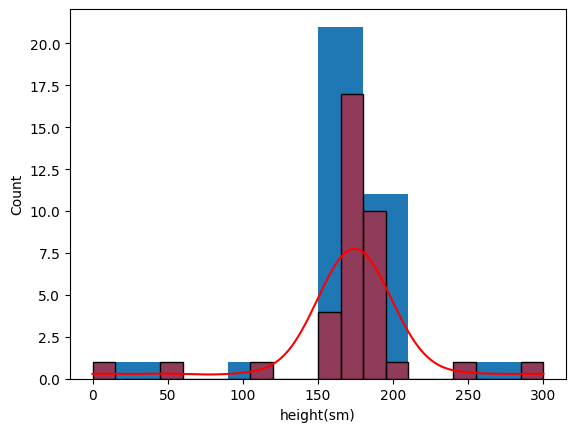

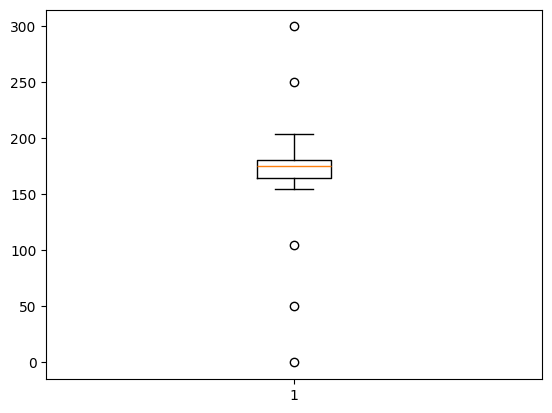

In [ ]:
statistics(height)

Выводы: среднее смещено в меньшую сторону от медианы, что может говорить о присутствии выбросов в виде аномально маленьких значений. Об этом говорит также смещение кривой распределения впаво и отрицательная скошенность. Наличие таких выбросов видно в диаграмме размаха.



In [ ]:
# удаляем выбросы
filt_height = height[(height >= 120) & (height <= 210)]

Среднее:  174.625
Медиана:  175.0
Дисперсия:  121.33870967741936
Стандартное отклонение:  11.015385135228788
Мода:  ModeResult(mode=165.0, count=6)
Максимальное значение:  204.0
Минимальное значение:  155.0
Скошенность:  0.42571358353506333
Эксцесс:  -0.06851944082013972
1 квартиль (25%) =  165.0
2 квартиль (50%) =  175.0
3 квартиль (75%) =  180.25


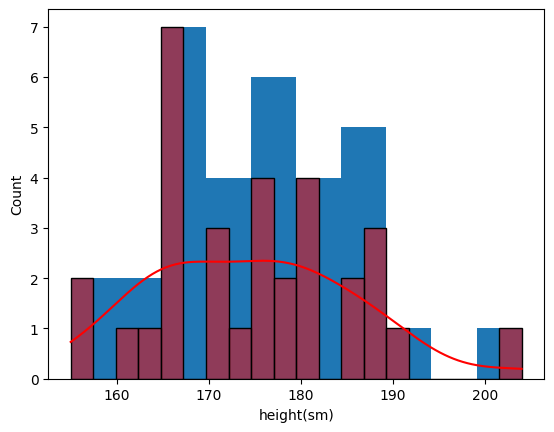

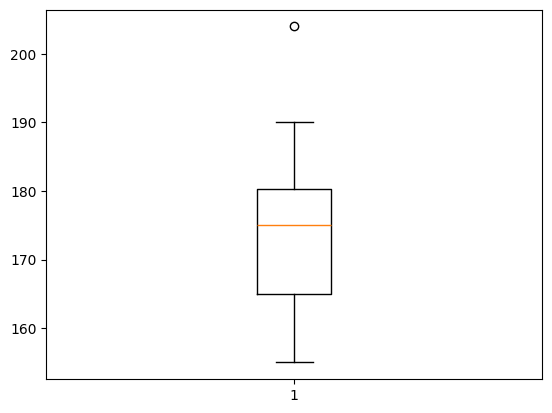

In [ ]:
statistics(filt_height)

После удаление выбросов можно видеть, что среднее значение и медиана стали почти равны, значительно уменьшилась дисперсия, и, соответственно, стандартное отклонение. У скошенности теперь небольшое положительное значение, что говорит о том, что кривая распределения немного смещена влево. Эксцесс практически нулевой, что характерно для симметричного распределения.

На диаграмме размаха видно один выброс, больший 200.

Среднее:  173.67741935483872
Медиана:  175.0
Дисперсия:  95.69247311827961
Стандартное отклонение:  9.782252967403757
Мода:  ModeResult(mode=165.0, count=6)
Максимальное значение:  190.0
Минимальное значение:  155.0
Скошенность:  0.007283330848012379
Эксцесс:  -0.9806158268401588
1 квартиль (25%) =  165.0
2 квартиль (50%) =  175.0
3 квартиль (75%) =  180.0


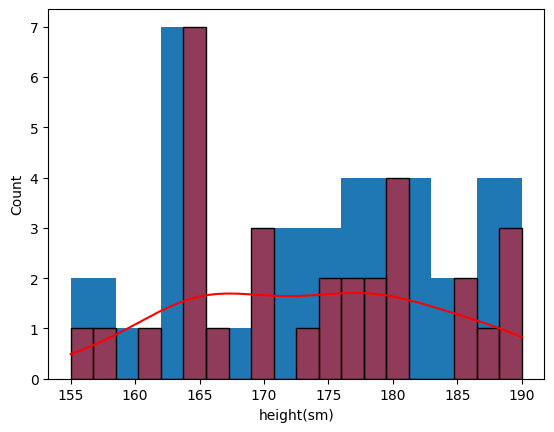

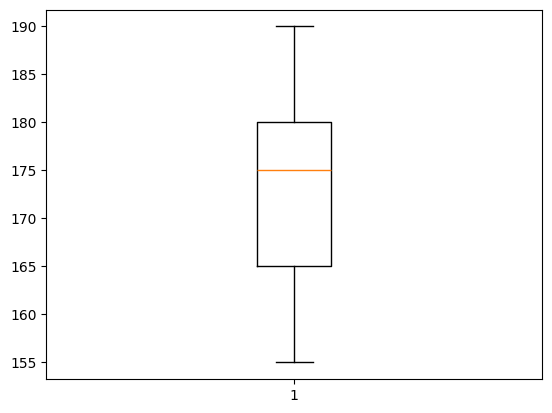

In [ ]:
# удаляем выброс
filt_height = filt_height[filt_height <= 200]
statistics(filt_height)

После удаления одного выброса получаем более симметричное распредление.

In [ ]:
# ответы на вопросы
print("Сколько правителей имеют рост более 170: ", (height > 170).sum())
print("Сколько правителей имеют рост более 170 и менее 190: ", ((height > 170) & (height < 190)).sum())

Сколько правителей имеют рост более 170:  20
Сколько правителей имеют рост более 170 и менее 190:  16


In [ ]:
def histogram(x, bins=10):
  ''' Функция для построения гистограммы.

      :return: массив с количеством элементов в каждом бине, массив с границами бинов'''
  edges = np.linspace(x.min(), x.max(), bins + 1)
  counts = np.zeros(bins) # задаем массив нулей размером с количество бинов
  for i in range(bins):
    # смотрим сколько элементов входит в каждый бин
    counts[i] = ((x >= edges[i]) & (x < edges[i + 1])).sum()
  counts[bins - 1] += 1 # включаем максимальный элемент
  return (counts, edges)

In [ ]:
np.histogram(height)

(array([ 1,  1,  0,  1,  0, 21, 11,  0,  1,  1]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]))

In [ ]:
# совпадает с предыдущим
histogram(height)

(array([ 1.,  1.,  0.,  1.,  0., 21., 11.,  0.,  1.,  1.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]))

**Выводы**: в данной работе был проведен анализ данных о росте правителей, который включал в себя проверку на наличие пустых значений и статистический анализ. В результате были удалены пустые значения и выбросы, после чего данные готовы к построению моделей машинного обучения.

Источники:

https://stackoverflow.com/questions/9560207/how-to-count-values-in-a-certain-range-in-a-numpy-array

https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5

https://statpsy.ru/descriptive/ekscess/